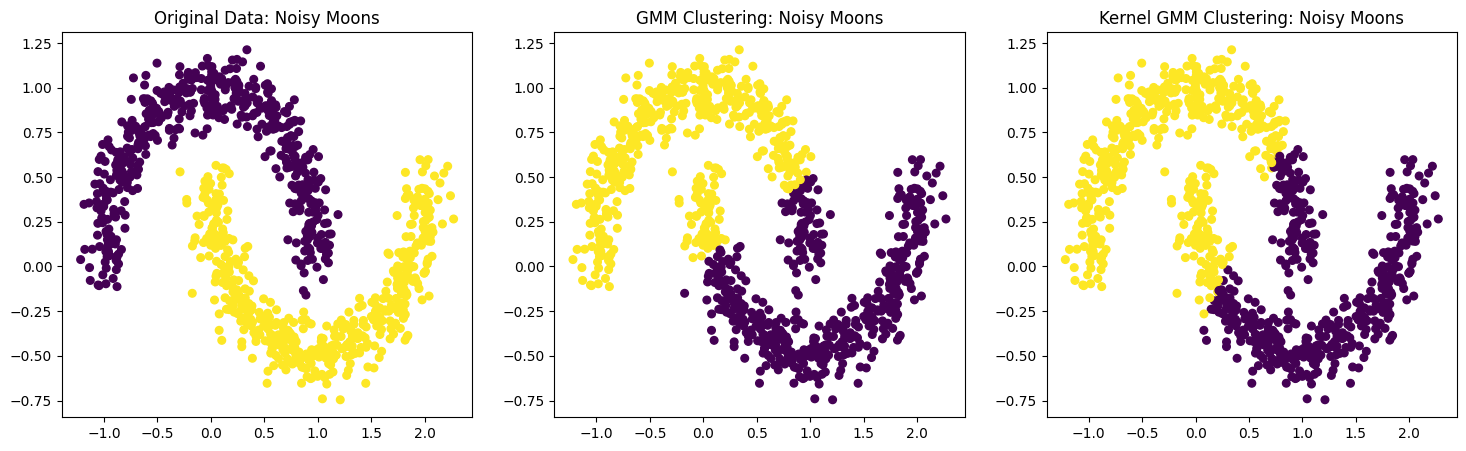

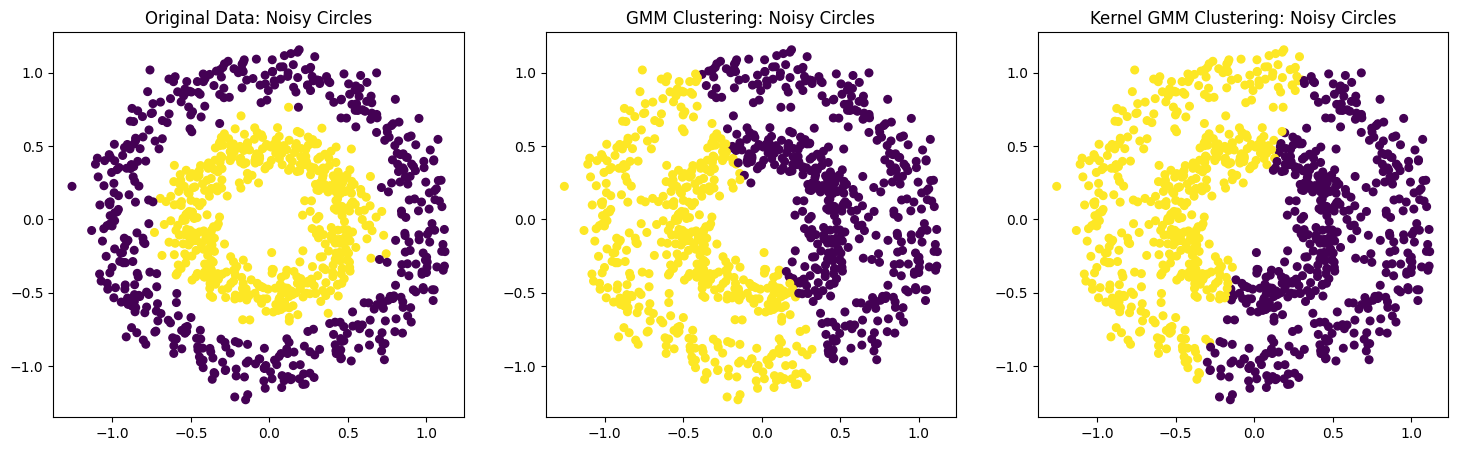

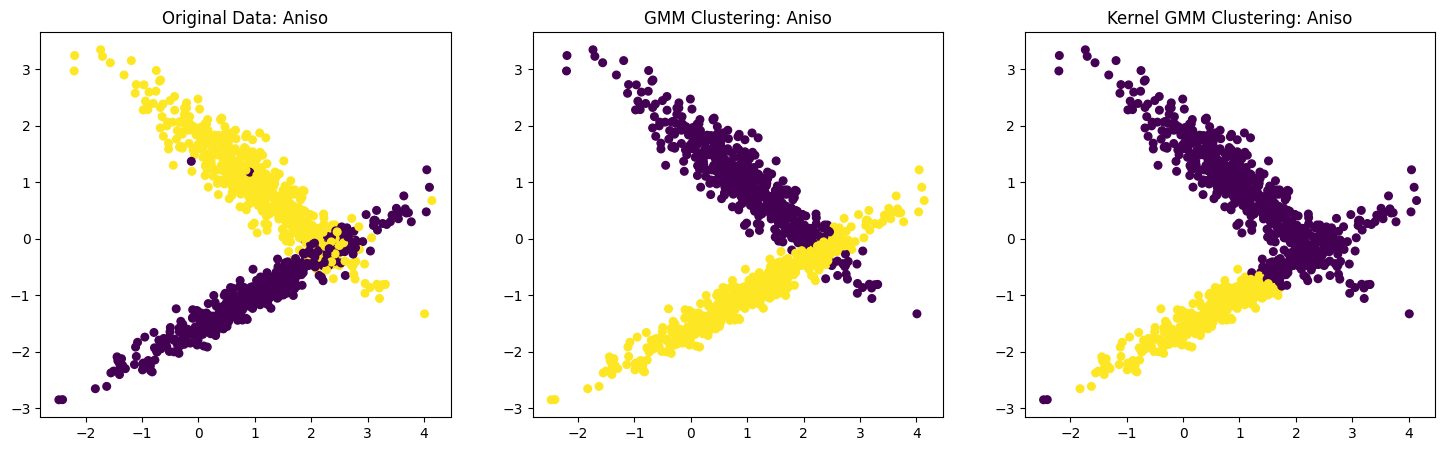

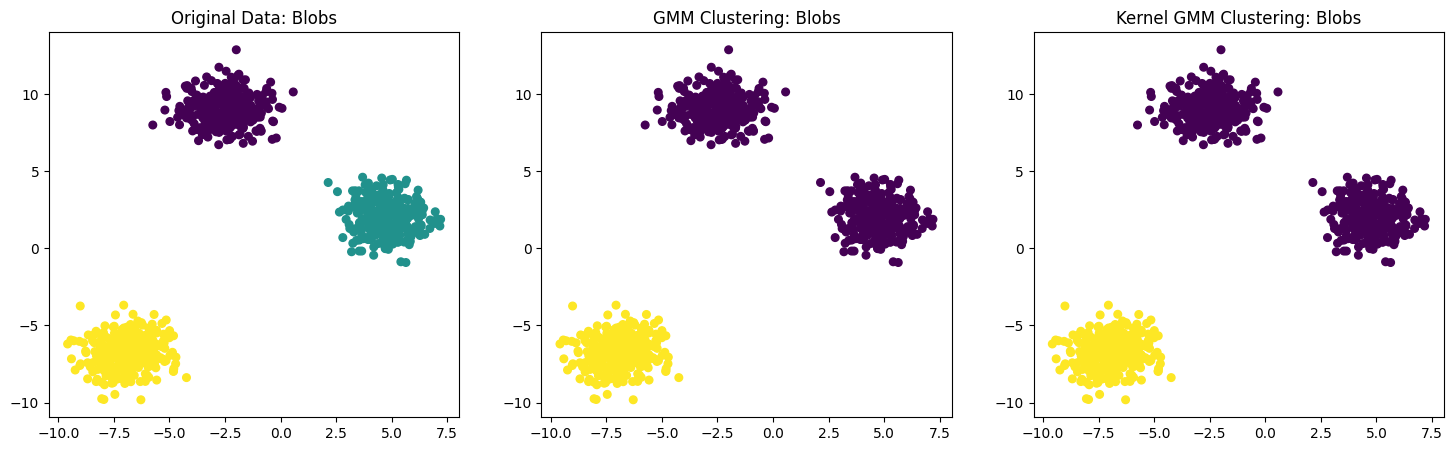

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA


# Define function to plot the results
def plot_clustering_results(X, y_true, gmm_labels, kernel_gmm_labels, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Original data
    axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
    axes[0].set_title(f"Original Data: {title}")

    # GMM clustering
    axes[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=30)
    axes[1].set_title(f"GMM Clustering: {title}")

    # Kernel GMM clustering
    axes[2].scatter(X[:, 0], X[:, 1], c=kernel_gmm_labels, cmap='viridis', s=30)
    axes[2].set_title(f"Kernel GMM Clustering: {title}")

    plt.show()

# Define function to generate and cluster datasets
def generate_and_cluster_data():
    datasets = [
        ('Noisy Moons', make_moons(n_samples=1000, noise=0.1, random_state=42)),
        ('Noisy Circles', make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)),
        ('Aniso', make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)),
        ('Blobs', make_blobs(n_samples=1000, centers=3, random_state=42))
    ]

    for title, (X, y_true) in datasets:
        # GMM clustering
        gmm = GaussianMixture(n_components=2, random_state=42)
        gmm_labels = gmm.fit_predict(X)

        # Kernel GMM clustering
        gamma = 1 / (2 * np.var(X))
        K = rbf_kernel(X, gamma=gamma)
        pca = PCA(n_components=2)
        K_reduced = pca.fit_transform(K)
        kernel_gmm = GaussianMixture(n_components=2, random_state=42)
        kernel_gmm_labels = kernel_gmm.fit_predict(K_reduced)

        # Plot the results for the current dataset
        plot_clustering_results(X, y_true, gmm_labels, kernel_gmm_labels, title)

# Run the clustering tests
generate_and_cluster_data()


# IDK what

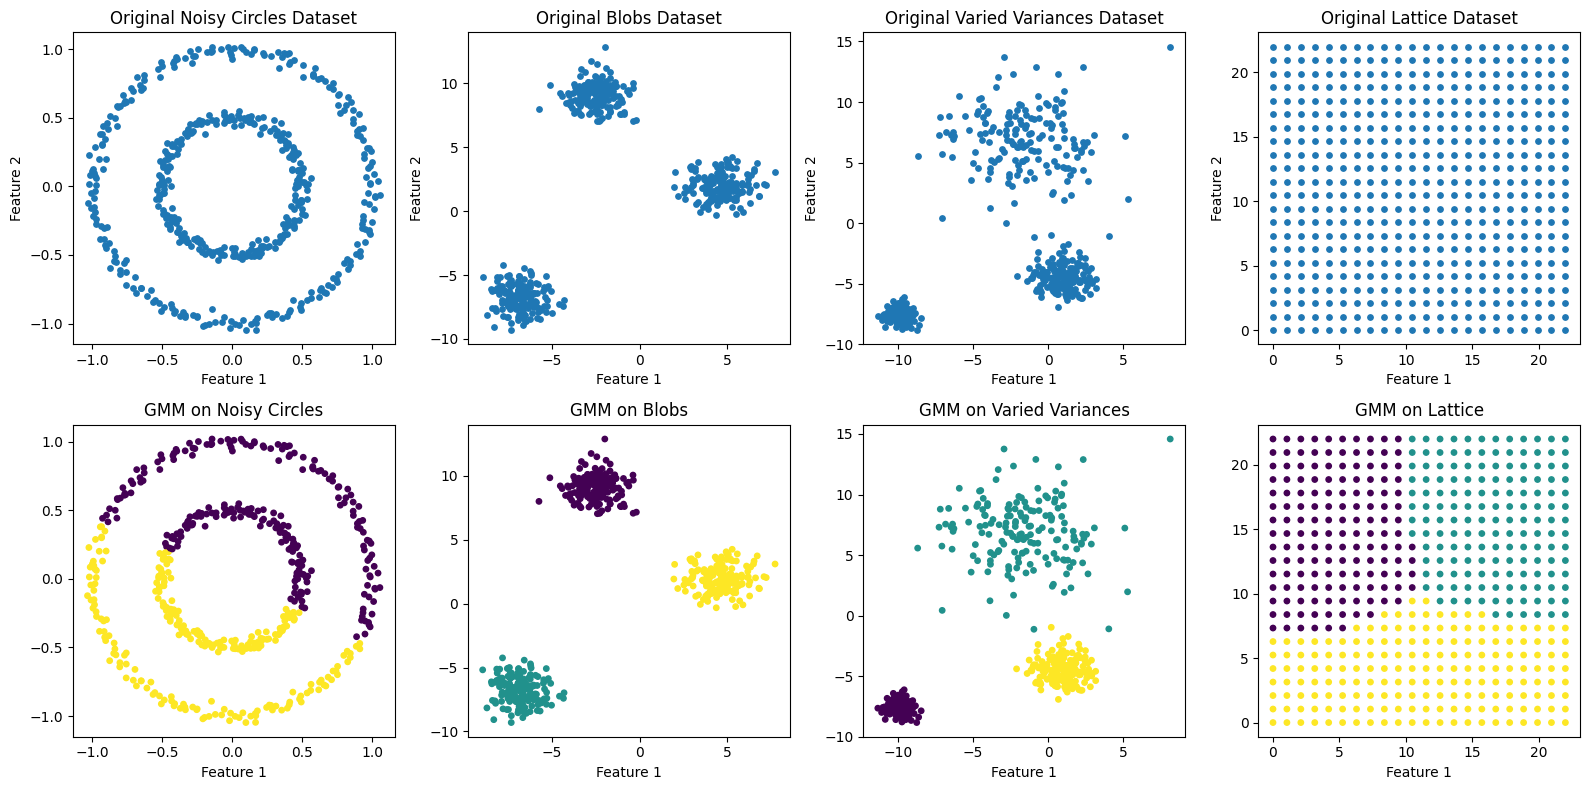

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100
grid_size = 22  # Number of points along one dimension of the grid
spacing = 1.0   # Spacing between points in the grid

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Generate lattice dataset
x = np.linspace(0, grid_size * spacing, grid_size)
y = np.linspace(0, grid_size * spacing, grid_size)
xx, yy = np.meshgrid(x, y)
lattice_data = np.c_[xx.ravel(), yy.ravel()]  # Flatten the grid into a 2D array

# Apply GMM to datasets
gmm_circles = GaussianMixture(n_components=2, random_state=0)
clusters_circles = gmm_circles.fit_predict(noisy_circles)

gmm_blobs = GaussianMixture(n_components=3, random_state=0)
clusters_blobs = gmm_blobs.fit_predict(blobs)

gmm_varied = GaussianMixture(n_components=3, random_state=0)
clusters_varied = gmm_varied.fit_predict(varied)

gmm_lattice = GaussianMixture(n_components=3, random_state=0)
clusters_lattice = gmm_lattice.fit_predict(lattice_data)

# Create subplots with a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=False)

datasets = [
    (noisy_circles, clusters_circles, "Noisy Circles"),
    (blobs, clusters_blobs, "Blobs"),
    (varied, clusters_varied, "Varied Variances"),
    (lattice_data, clusters_lattice, "Lattice"),
]

# Plot datasets and clustering results
for i, (data, clusters, title) in enumerate(datasets):
    # Plot original dataset
    axes[0, i].scatter(data[:, 0], data[:, 1], s=15)
    axes[0, i].set_title(f"Original {title} Dataset")
    axes[0, i].set_xlabel("Feature 1")
    axes[0, i].set_ylabel("Feature 2")

    # Plot GMM clustering results
    axes[1, i].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=15)
    axes[1, i].set_title(f"GMM on {title}")
    axes[1, i].set_xlabel("Feature 1")

# Adjust layout and show plots
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2),
    (blobs, labels_blobs, "Blobs", 3),
    (varied, labels_varied, "Varied Variances", 3),
]

# Function to calculate the Hungarian algorithm mapping
def calculate_hungarian_mapping(true_labels, predicted_labels):
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))

    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            # Cost is negative of the overlap
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))

    # Apply Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Mapping: predicted_label -> true_label
    mapping = {unique_pred[j]: unique_true[i] for i, j in zip(row_ind, col_ind)}

    return cost_matrix, mapping

# Apply GMM clustering and calculate mappings
for data, true_labels, name, n_clusters in datasets:
    print(f"\nDataset: {name}")

    # Fit GMM and predict clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    predicted_labels = gmm.fit_predict(data)

    # Calculate Hungarian mapping
    cost_matrix, mapping = calculate_hungarian_mapping(true_labels, predicted_labels)

    # Print the cost matrix and mapping
    print("Cost Matrix:")
    print(cost_matrix)
    print("Optimal Mapping:")
    print(mapping)

    # Optionally: Show adjusted labels for validation
    adjusted_labels = np.array([mapping[label] for label in predicted_labels])
    print("Adjusted Labels (First 10):", adjusted_labels[:10])



Dataset: Noisy Circles
Cost Matrix:
[[-127. -123.]
 [-125. -125.]]
Optimal Mapping:
{0: 0, 1: 1}
Adjusted Labels (First 10): [0 1 1 0 0 0 0 1 1 0]

Dataset: Blobs
Cost Matrix:
[[-167.    0.    0.]
 [   0.    0. -167.]
 [   0. -166.    0.]]
Optimal Mapping:
{0: 0, 2: 1, 1: 2}
Adjusted Labels (First 10): [2 1 1 0 1 1 2 1 1 2]

Dataset: Varied Variances
Cost Matrix:
[[   0.   -1. -166.]
 [   0. -167.    0.]
 [-166.    0.    0.]]
Optimal Mapping:
{2: 0, 1: 1, 0: 2}
Adjusted Labels (First 10): [2 2 1 1 0 2 2 0 1 0]


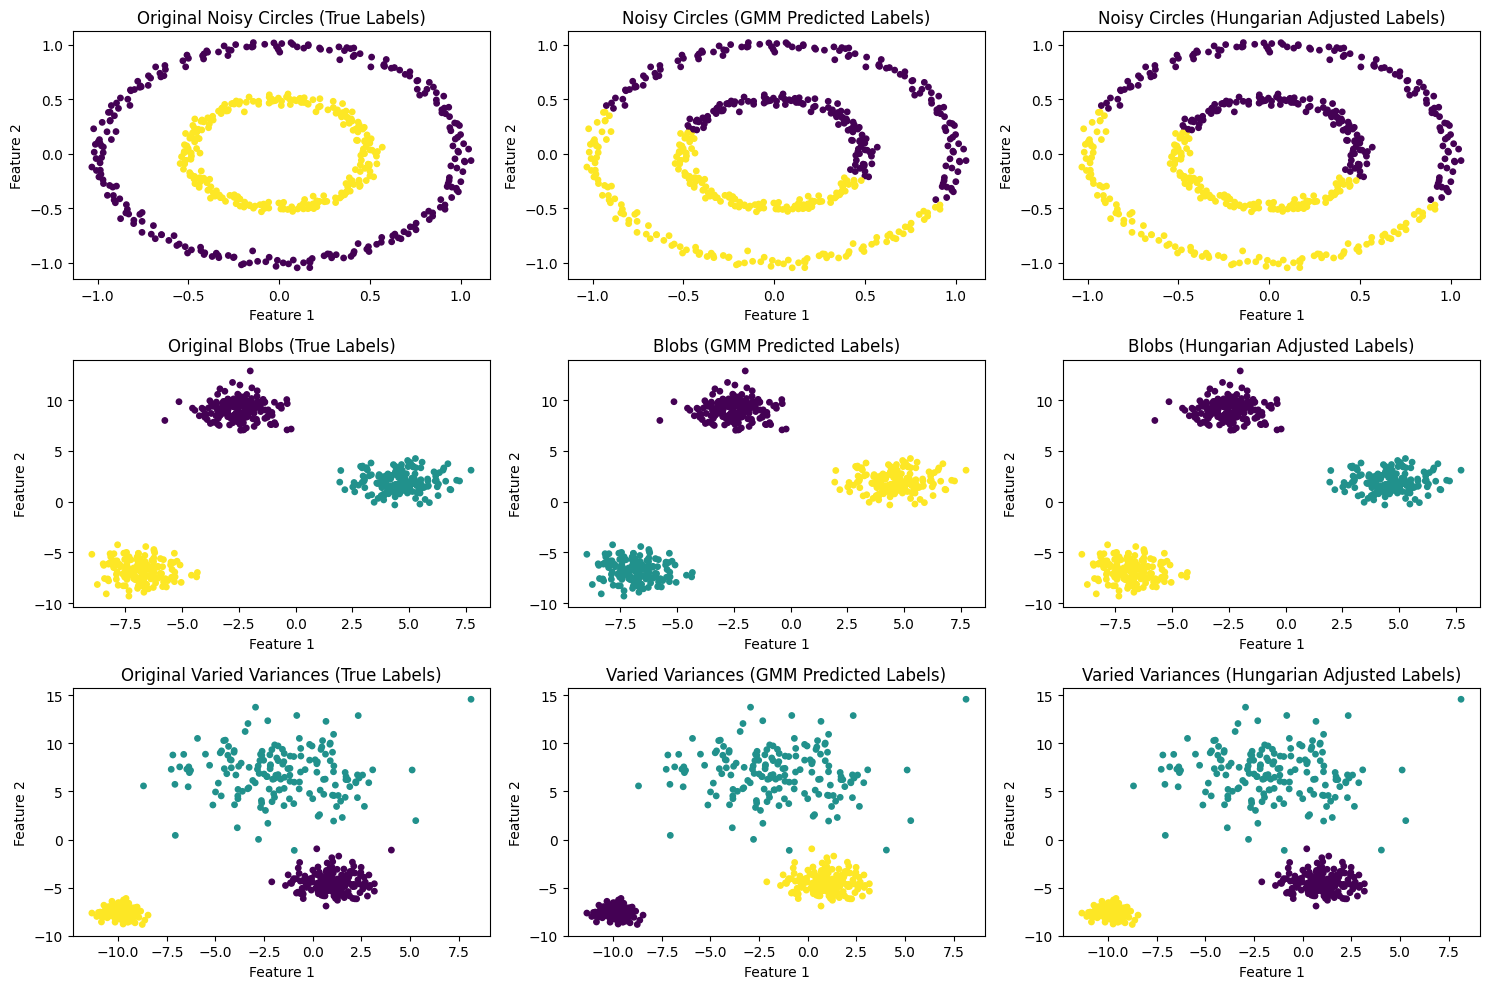

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2),
    (blobs, labels_blobs, "Blobs", 3),
    (varied, labels_varied, "Varied Variances", 3),
]

# Function to calculate the Hungarian algorithm mapping
def calculate_hungarian_mapping(true_labels, predicted_labels):
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))

    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))

    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {unique_pred[j]: unique_true[i] for i, j in zip(row_ind, col_ind)}

    return mapping

# Create subplots
fig, axes = plt.subplots(len(datasets), 3, figsize=(15, 10), sharey=False)

for i, (data, true_labels, name, n_clusters) in enumerate(datasets):
    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    predicted_labels = gmm.fit_predict(data)

    # Apply Hungarian algorithm
    mapping = calculate_hungarian_mapping(true_labels, predicted_labels)
    adjusted_labels = np.array([mapping[label] for label in predicted_labels])

    # Plot original dataset with true labels
    axes[i, 0].scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', s=15)
    axes[i, 0].set_title(f"Original {name} (True Labels)")

    # Plot predicted clusters
    axes[i, 1].scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', s=15)
    axes[i, 1].set_title(f"{name} (GMM Predicted Labels)")

    # Plot adjusted clusters after Hungarian mapping
    axes[i, 2].scatter(data[:, 0], data[:, 1], c=adjusted_labels, cmap='viridis', s=15)
    axes[i, 2].set_title(f"{name} (Hungarian Adjusted Labels)")

# Add axis labels and adjust layout
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


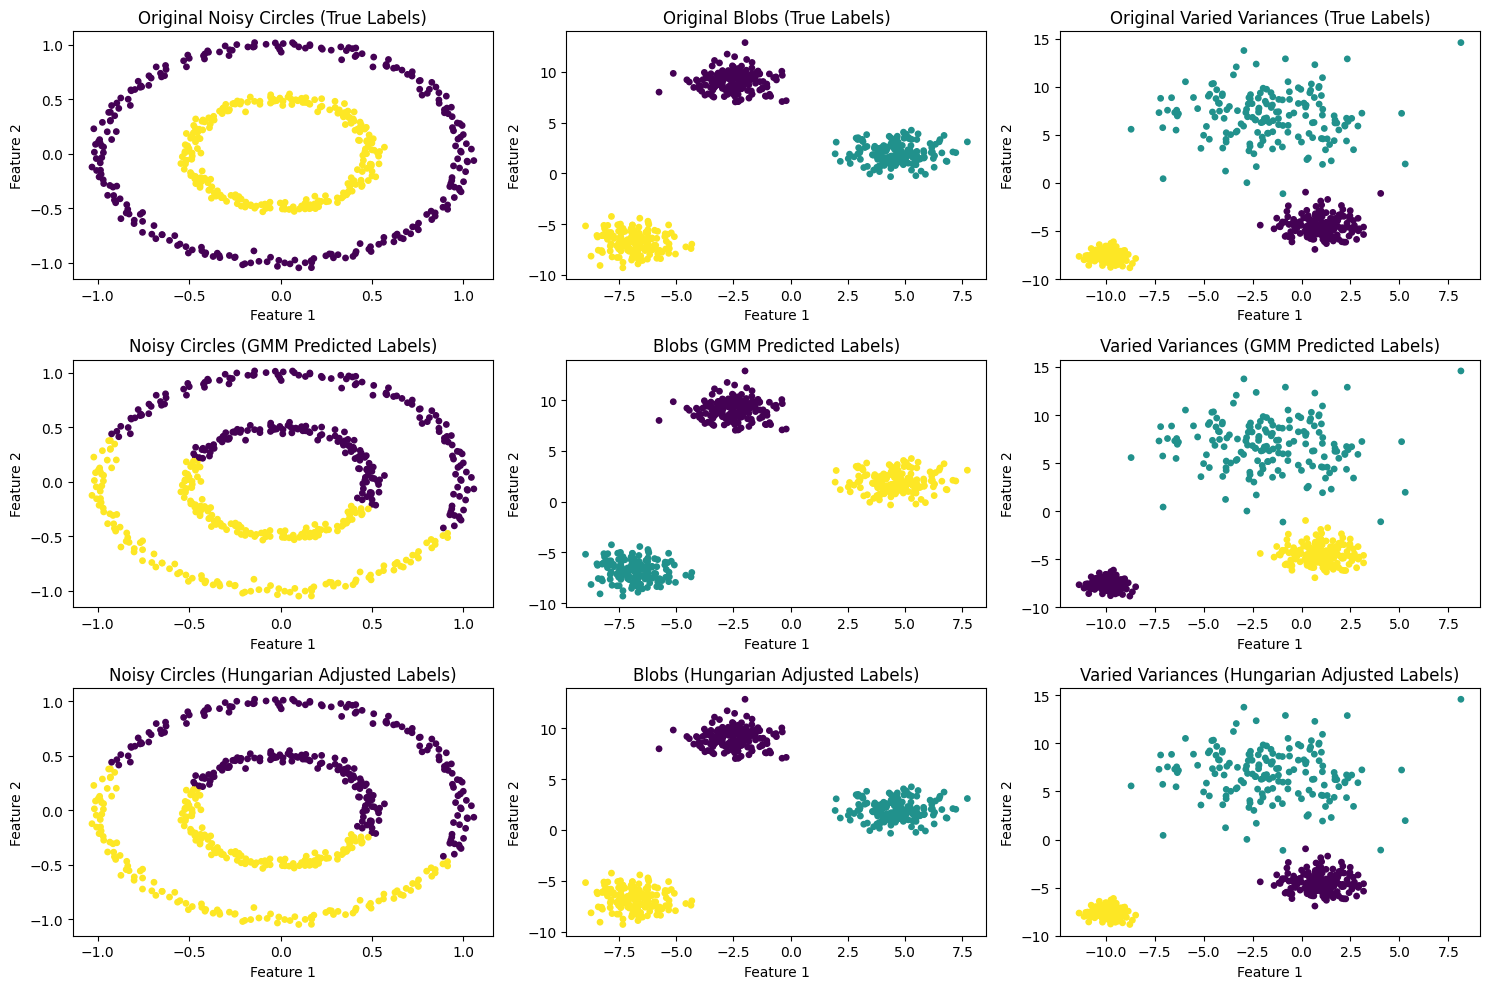


WCSS Results:
Noisy Circles: 198.15
Blobs: 955.65
Varied Variances: 2906.84

Accuracy Results:
Noisy Circles: 0.50
Blobs: 1.00
Varied Variances: 1.00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)


# # Scale the dataset so the outer circle has a radius of 10
# max_radius = 10  # Desired maximum radius
# outer_circle_max_distance = np.max(np.linalg.norm(noisy_circles[labels_circles == 0], axis=1))
# scaling_factor = max_radius / outer_circle_max_distance
# noisy_circles = noisy_circles * scaling_factor

# # Verify the largest circle's radius
# outer_circle_scaled_max_distance = np.max(np.linalg.norm(noisy_circles_scaled[labels_circles == 0], axis=1))
# print(f"Largest circle's radius after scaling: {outer_circle_scaled_max_distance}")



blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2),
    (blobs, labels_blobs, "Blobs", 3),
    (varied, labels_varied, "Varied Variances", 3),
]

# Function to calculate the Hungarian algorithm mapping
def calculate_hungarian_mapping(true_labels, predicted_labels):
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))

    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))

    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {unique_pred[j]: unique_true[i] for i, j in zip(row_ind, col_ind)}

    return mapping

# Function to calculate WCSS
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Function to calculate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    """Calculate accuracy using adjusted labels."""
    mapping = calculate_hungarian_mapping(true_labels, predicted_labels)
    adjusted_labels = np.array([mapping[label] for label in predicted_labels])
    return np.sum(adjusted_labels == true_labels) / len(true_labels)

# Initialize lists to store WCSS and accuracy
wcss_list = []
accuracy_list = []

# Create subplots
fig, axes = plt.subplots(len(datasets), 3, figsize=(15, 10), sharey=False)

for i, (data, true_labels, name, n_clusters) in enumerate(datasets):
    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    predicted_labels = gmm.fit_predict(data)

    # Apply Hungarian algorithm
    mapping = calculate_hungarian_mapping(true_labels, predicted_labels)
    adjusted_labels = np.array([mapping[label] for label in predicted_labels])

    # Calculate WCSS
    wcss = calculate_wcss(data, adjusted_labels)
    wcss_list.append((name, wcss))

    # Calculate Accuracy
    accuracy = calculate_accuracy(true_labels, predicted_labels)
    accuracy_list.append((name, accuracy))

    # Plot original dataset with true labels
    axes[0, i].scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', s=15)
    axes[0, i].set_title(f"Original {name} (True Labels)")

    # Plot predicted clusters
    axes[1, i].scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', s=15)
    axes[1, i].set_title(f"{name} (GMM Predicted Labels)")

    # Plot adjusted clusters after Hungarian mapping
    axes[2, i].scatter(data[:, 0], data[:, 1], c=adjusted_labels, cmap='viridis', s=15)
    axes[2, i].set_title(f"{name} (Hungarian Adjusted Labels)")

# Add axis labels and adjust layout
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Print WCSS and accuracy results
print("\nWCSS Results:")
for name, wcss in wcss_list:
    print(f"{name}: {wcss:.2f}")

print("\nAccuracy Results:")
for name, accuracy in accuracy_list:
    print(f"{name}: {accuracy:.2f}")


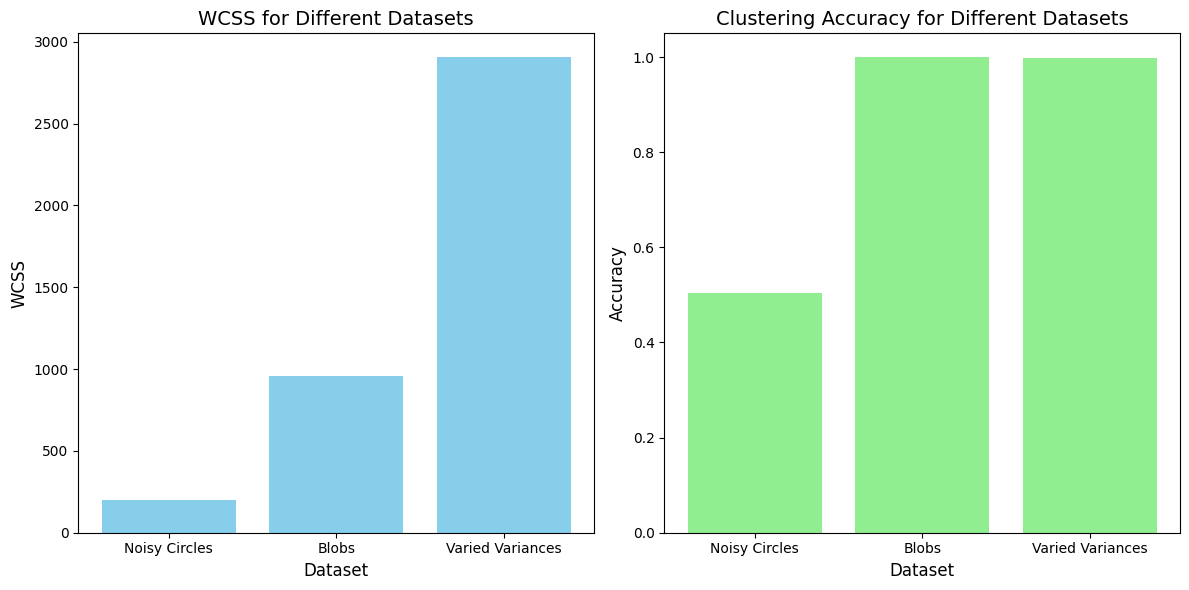

In [4]:
# Plot WCSS and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot WCSS
datasets_names = [name for name, _ in wcss_list]
wcss_values = [wcss for _, wcss in wcss_list]
axes[0].bar(datasets_names, wcss_values, color='skyblue')
axes[0].set_title("WCSS for Different Datasets", fontsize=14)
axes[0].set_ylabel("WCSS", fontsize=12)
axes[0].set_xlabel("Dataset", fontsize=12)

# Plot Accuracy
accuracy_values = [accuracy for _, accuracy in accuracy_list]
axes[1].bar(datasets_names, accuracy_values, color='lightgreen')
axes[1].set_title("Clustering Accuracy for Different Datasets", fontsize=14)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_xlabel("Dataset", fontsize=12)

plt.tight_layout()
plt.show()

# Bank Dataset

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

# Inspect the data structure
print(data.head())

# Select relevant features for clustering
features = data[['TransactionAmount', 'CustomerAge']]

# Ensure no missing values in the selected features
features = features.dropna()

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

WCSS for GMM clustering: 2002.72


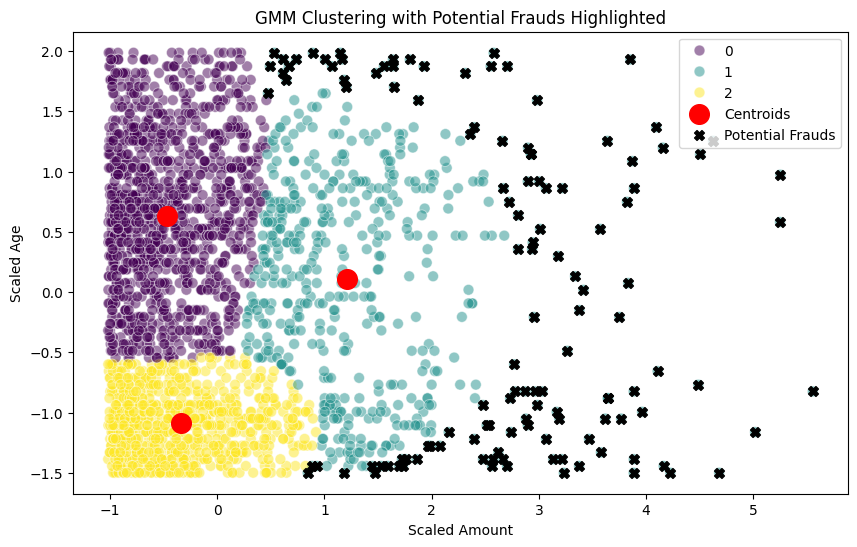

Number of potential frauds detected: 126


In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
X = data[['TransactionAmount', 'CustomerAge']]
# X = data[['TransactionAmount', 'LoginAttempts']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# GMM clustering with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components if needed
gmm_labels = gmm.fit_predict(X_scaled)

# Add labels to the dataset
data['GMM_Cluster'] = gmm_labels

# Calculate distance of each point to its assigned cluster centroid
centroids = gmm.means_
distances = np.linalg.norm(X_scaled - centroids[gmm_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)

# Flag points above the threshold as potential frauds
data['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = data[data['Potential_Fraud']]
non_frauds = data[~data['Potential_Fraud']]

# Calculate WCSS
def calculate_wcss(data, labels, centroids):
    wcss = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        centroid = centroids[cluster_id]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

wcss = calculate_wcss(X_scaled, gmm_labels, centroids)
print(f"WCSS for GMM clustering: {wcss:.2f}")

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('GMM Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, gmm_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, gmm_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Calculate Cluster Cohesion and Separation
def calculate_cohesion_separation(data, labels, centroids):
    cohesion = 0
    separation = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        cohesion += np.sum((cluster_points - centroids[cluster_id]) ** 2)
        for other_id in np.unique(labels):
            if cluster_id != other_id:
                separation += np.linalg.norm(centroids[cluster_id] - centroids[other_id]) ** 2
    return cohesion, separation

cohesion, separation = calculate_cohesion_separation(X_scaled, gmm_labels, centroids)
print(f"Cluster Cohesion: {cohesion:.2f}")
print(f"Cluster Separation: {separation:.2f}")


Silhouette Score: 0.42
Calinski-Harabasz Index: 1975.59
Davies-Bouldin Index: 0.88
Cluster Cohesion: 2002.72
Cluster Separation: 19.81


Silhouette Score: 0.42
Calinski-Harabasz Index: 1975.59
Davies-Bouldin Index: 0.88
Cluster Cohesion: 2002.72
Cluster Separation: 19.81


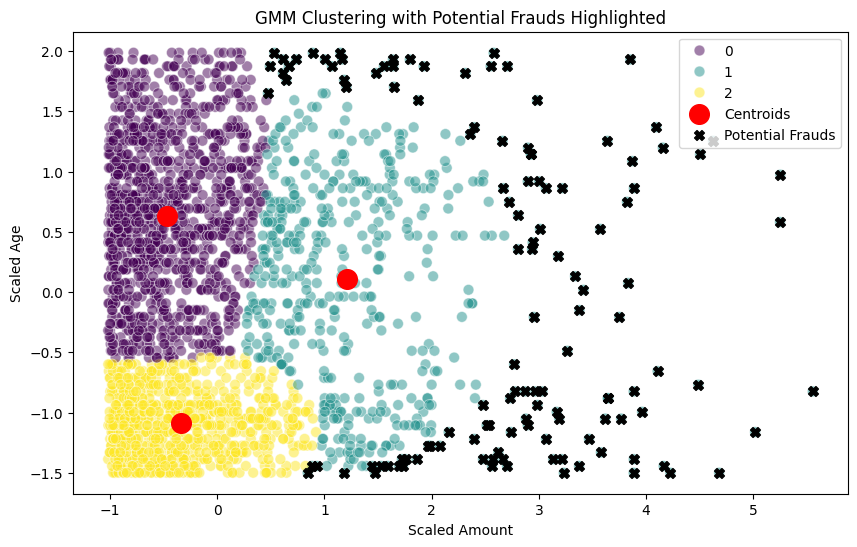

Number of potential frauds detected: 126


In [9]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, gmm_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, gmm_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Calculate Cluster Cohesion and Separation
def calculate_cohesion_separation(data, labels, centroids):
    cohesion = 0
    separation = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        cohesion += np.sum((cluster_points - centroids[cluster_id]) ** 2)
        for other_id in np.unique(labels):
            if cluster_id != other_id:
                separation += np.sum((centroids[cluster_id] - centroids[other_id]) ** 2)
    return cohesion, separation

cohesion, separation = calculate_cohesion_separation(X_scaled, gmm_labels, centroids)
print(f"Cluster Cohesion: {cohesion:.2f}")
print(f"Cluster Separation: {separation:.2f}")

# Updated plot for clusters and frauds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('GMM Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")


# Travel

WCSS for GMM clustering: 264579.99


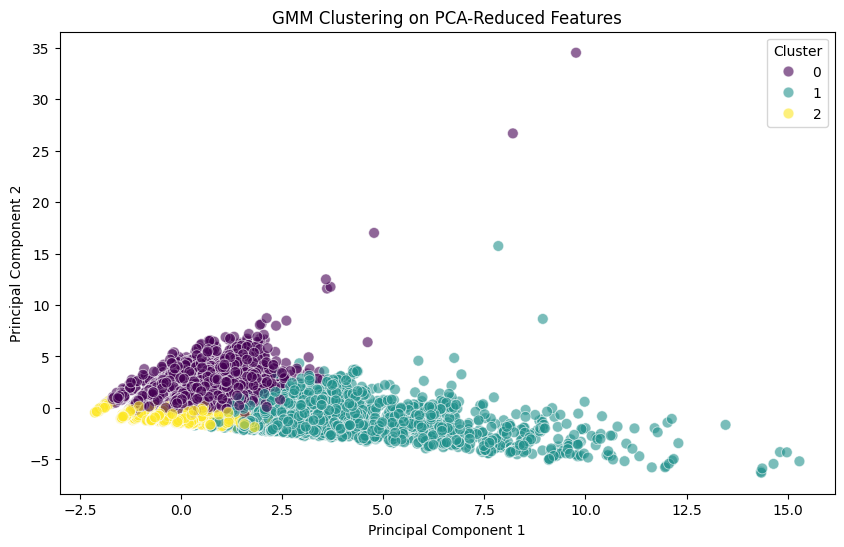

In [10]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/travel.csv'
data = pd.read_csv(file_path)

# Feature engineering: Calculate 'travel_duration' and 'days_in_advance'
data['srch_ci'] = pd.to_datetime(data['srch_ci'])
data['srch_co'] = pd.to_datetime(data['srch_co'])
data['date_time'] = pd.to_datetime(data['date_time'])

data['travel_duration'] = (data['srch_co'] - data['srch_ci']).dt.days
data['days_in_advance'] = (data['srch_ci'] - data['date_time']).dt.days

# Select relevant features
features = [
    'travel_duration',
    'days_in_advance',
    'orig_destination_distance',
    'srch_adults_cnt',
    'srch_children_cnt',
    'srch_rm_cnt'
]
X = data[features]

# Drop rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components if needed
gmm_labels = gmm.fit_predict(X_scaled)

# Add labels to the dataset
data = data.loc[X.index]  # Keep rows corresponding to valid features
data['GMM_Cluster'] = gmm_labels

# Calculate WCSS
def calculate_wcss(data, labels):
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])
    wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in np.unique(labels))
    return wcss

wcss = calculate_wcss(X_scaled, gmm_labels)
print(f"WCSS for GMM clustering: {wcss:.2f}")

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters along the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='viridis', s=60, alpha=0.6
)
plt.title('GMM Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.24
Calinski-Harabasz Index: 14295.56
Davies-Bouldin Index: 1.58
WCSS: 264579.99
Cluster Cohesion: 264579.99
Cluster Separation: 1772143.80


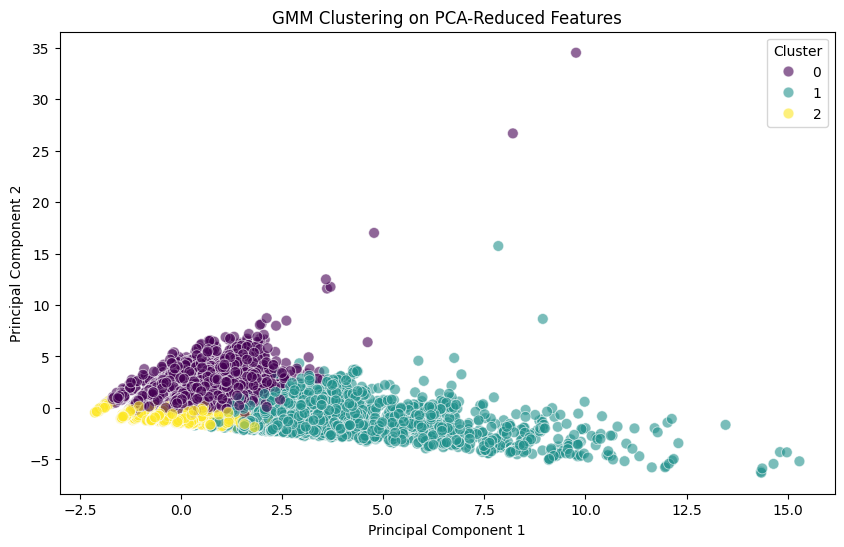

In [11]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/travel.csv'
data = pd.read_csv(file_path)

# Feature engineering: Calculate 'travel_duration' and 'days_in_advance'
data['srch_ci'] = pd.to_datetime(data['srch_ci'])
data['srch_co'] = pd.to_datetime(data['srch_co'])
data['date_time'] = pd.to_datetime(data['date_time'])

data['travel_duration'] = (data['srch_co'] - data['srch_ci']).dt.days
data['days_in_advance'] = (data['srch_ci'] - data['date_time']).dt.days

# Select relevant features
features = [
    'travel_duration',
    'days_in_advance',
    'orig_destination_distance',
    'srch_adults_cnt',
    'srch_children_cnt',
    'srch_rm_cnt'
]
X = data[features]

# Drop rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Add labels to the dataset
data = data.loc[X.index]  # Keep rows corresponding to valid features
data['GMM_Cluster'] = gmm_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, gmm_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, gmm_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Calculate WCSS
def calculate_wcss(data, labels):
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])
    wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in np.unique(labels))
    return wcss

wcss = calculate_wcss(X_scaled, gmm_labels)
print(f"WCSS: {wcss:.2f}")

# Cluster Cohesion and Separation
def calculate_cohesion_separation(data, labels):
    cohesion = 0
    separation = 0
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        cohesion += np.sum((cluster_points - centroids[cluster_id]) ** 2)
        other_centroids = np.delete(centroids, cluster_id, axis=0)
        separation += np.sum((cluster_points[:, None, :] - other_centroids) ** 2)
    return cohesion, separation

cohesion, separation = calculate_cohesion_separation(X_scaled, gmm_labels)
print(f"Cluster Cohesion: {cohesion:.2f}")
print(f"Cluster Separation: {separation:.2f}")

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters along the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='viridis', s=60, alpha=0.6
)
plt.title('GMM Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
